In [4]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer  # 用于处理缺失值
from sklearn.preprocessing import StandardScaler  # 用于标准化数据
from sklearn.pipeline import Pipeline  # 用于构建处理流程
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 加载数据
data = pd.read_csv('../dataset/D__Network Privacy and Security_data.csv')

# 筛选只保留"BENIGN"(正常) 和 "PortScan"(异常) 两种类型的数据
data_filtered = data[data[' Label'].isin(['BENIGN', 'PortScan'])]

# 检查数据中的缺失值情况
print(f"数据中的总缺失值数量: {data_filtered.isna().sum().sum()}")
print(f"有缺失值的特征数量: {(data_filtered.isna().sum() > 0).sum()}")

数据中的总缺失值数量: 3833388
有缺失值的特征数量: 78


In [6]:
# 拆分特征(X)和标签(y)，并转换标签为数值型
X = data_filtered.iloc[:, :-1]  # 所有列，除了最后一列标签
y = data_filtered[' Label'].map({'BENIGN': 0, 'PortScan': 1})  # 0正常, 1异常

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# 创建处理管道：
# 1. 使用均值填充缺失值
# 2. 数据标准化
# 3. 逻辑回归模型
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # 使用均值填充缺失值
    ('scaler', StandardScaler()),  # 标准化数据
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # 逻辑回归分类器
])

In [8]:
# 训练模型
print("开始训练模型...")
pipeline.fit(X_train, y_train)
print("模型训练完成！")


开始训练模型...
模型训练完成！


In [9]:
# 模型预测
y_pred = pipeline.predict(X_test)

# 输出模型评估结果
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "PortScan (1)"]))



分类报告:
              precision    recall  f1-score   support

  Normal (0)       0.78      0.95      0.85     24617
PortScan (1)       0.90      0.63      0.74     18139

    accuracy                           0.81     42756
   macro avg       0.84      0.79      0.80     42756
weighted avg       0.83      0.81      0.81     42756




分类报告:
              precision    recall  f1-score   support

  Normal (0)       0.78      0.95      0.85     24617
PortScan (1)       0.90      0.63      0.74     18139

    accuracy                           0.81     42756
   macro avg       0.84      0.79      0.80     42756
weighted avg       0.83      0.81      0.81     42756



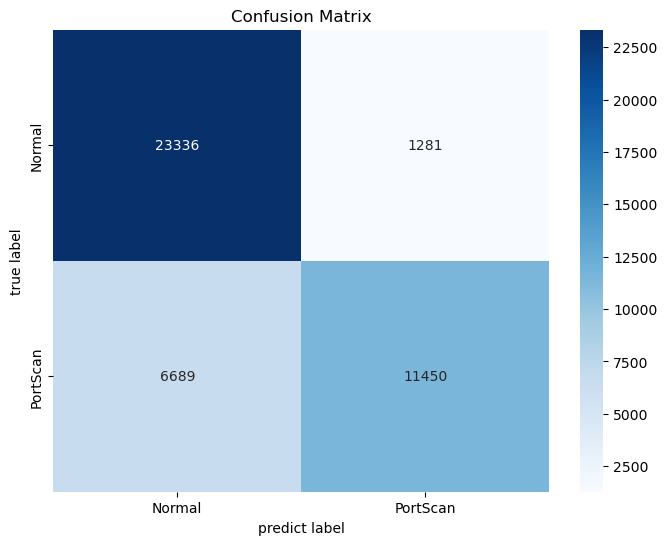

In [10]:
# 输出模型评估结果
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "PortScan (1)"]))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Normal", "PortScan"],
            yticklabels=["Normal", "PortScan"])
plt.xlabel('predict label')
plt.ylabel('true label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# 输出模型准确率
accuracy = pipeline.score(X_test, y_test)
print(f"\n模型准确率: {accuracy:.4f}")



模型准确率: 0.8136


In [12]:
# 获取训练后的逻辑回归模型
logistic_model = pipeline.named_steps['classifier']

# 检查特征重要性 (系数绝对值大小)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(logistic_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# 显示前15个最重要的特征
print("\n前15个最重要的特征:")
print(feature_importance.head(15))



前15个最重要的特征:
                        Feature  Importance
16          num__ Flow IAT Mean    2.802579
21           num__ Fwd IAT Mean    1.856596
17           num__ Flow IAT Std    1.551841
46         num__ PSH Flag Count    1.435317
35      num__ Bwd Header Length    1.102317
26           num__ Bwd IAT Mean    1.076053
76               num__ Idle Max    0.965247
52    num__ Average Packet Size    0.932134
24            num__ Fwd IAT Min    0.926754
40     num__ Packet Length Mean    0.865939
9   num__ Fwd Packet Length Std    0.841288
74               num__Idle Mean    0.789870
77               num__ Idle Min    0.760340
41      num__ Packet Length Std    0.626697
65      num__ Subflow Bwd Bytes    0.611975


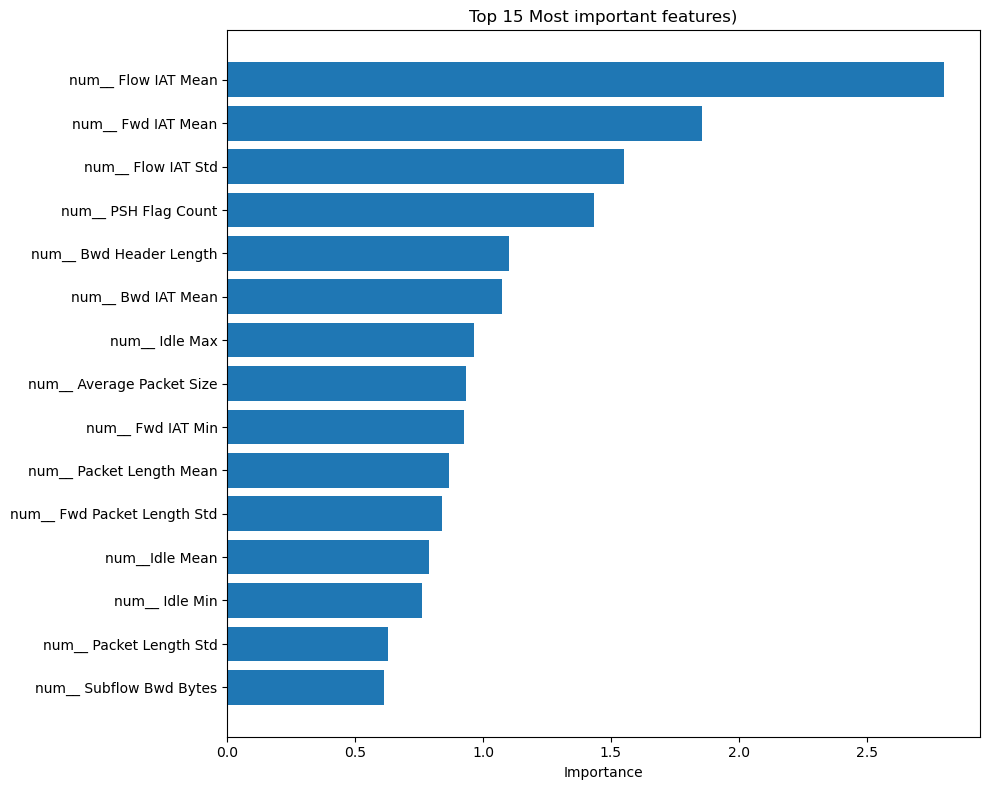

In [13]:
# 绘制特征重要性图
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Most important features)')
plt.gca().invert_yaxis()  # 让最重要的特征显示在顶部
plt.tight_layout()
plt.show()